In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

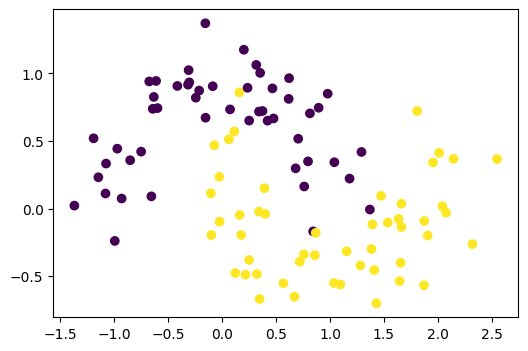

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y) 
plt.show()

# Case A -Impact on Sigmoid activation

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers

model = models.Sequential()
model.add(layers.Input(shape = (2,)))  #input layer
model.add(layers.Dense(
    units=10, 
    activation='sigmoid',
    kernel_initializer='zeros',  # Sets weights to 0
    # bias_initializer='zeros'     # by default weights are already zero
))

model.add(layers.Dense(
    units=1, 
    activation='sigmoid',
    kernel_initializer='zeros',
))

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# weights before training

model.layers[0].get_weights() # 20 weights and 10 bias in first layer

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [18]:
# training the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 407ms/step - accuracy: 0.4500 - loss: 0.6934 - val_accuracy: 0.6000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6939
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5250 - loss: 0.6931 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5250 - loss: 0.6928 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 304ms/step - accuracy: 0.5250 - loss: 0.6927 - val_accuracy: 0.4000 - val_loss: 0.6953
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5250 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6959
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5250 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6965
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5250 - loss: 0.6924 - val_accuracy: 0.4000 - val

In [19]:
model.get_weights()

[array([[-0.4258363 , -0.4258363 , -0.4258363 , -0.4258363 , -0.4258363 ,
         -0.4258363 , -0.4258363 , -0.4258363 , -0.4258363 , -0.4258363 ],
        [ 0.42927212,  0.42927212,  0.42927212,  0.42927212,  0.42927212,
          0.42927212,  0.42927212,  0.42927212,  0.42927212,  0.42927212]],
       dtype=float32),
 array([-0.08181784, -0.08181784, -0.08181784, -0.08181784, -0.08181784,
        -0.08181784, -0.08181784, -0.08181784, -0.08181784, -0.08181784],
       dtype=float32),
 array([[-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731],
        [-0.08588731]], dtype=float32),
 array([0.0589488], dtype=float32)]

Training happens in case of sigmoid. but weights are equal from each input.
weights from input layer from first input to all the nodes are same.
Hence, hidden layer in middle are acting as a single node.

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step


<Axes: >

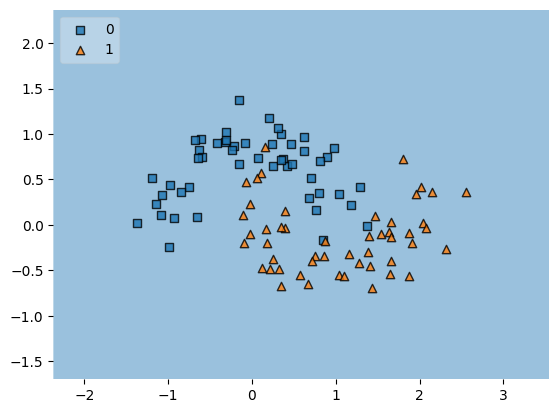

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

As we can see in result there is no any decision boundry visible

# Case B- relu/tanh activation

In [22]:
model = models.Sequential()
model.add(layers.Input(shape = (2,)))  #input layer
model.add(layers.Dense(
    units=10, 
    activation='relu',
    kernel_initializer='zeros',  # Sets weights to 0
    # bias_initializer='zeros'     # by default weights are already zero
))

model.add(layers.Dense(
    units=1, 
    activation='sigmoid',
    kernel_initializer='zeros',
))

In [26]:
# weights before training 
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.06116919], dtype=float32)]

In [27]:
# training the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.6998
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.6999
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7000
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7000
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7000
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss

In [28]:
# weights after training
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([-0.07668358], dtype=float32)]

So, the weights after training is zero. this shows that there is no training happens in the case of relu activation at all.
Similarly, there will be no training in the case of tanh also.

**Conclusion:** so we need a different weights initialization techniques